# **Telco Customer Churn**

---------

## İş Problemi

**Senaryo**

Problem : Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir.
Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

elco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.

# 21 Değişken 7043 Gözlem

## Veri Seti Hikayesi

*elco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.*

21 Değişken 7043 Gözlem

In [182]:
### Değişkenler

# CustomerId : Müşteri İd’si
# Gender : Cinsiyet
# SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
# Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
# Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
# tenure : Müşterinin şirkette kaldığı ay sayısı
# PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
# MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
# InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
# OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
# StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
# Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
# PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
# PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
# MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges : Müşteriden tahsil edilen toplam tutar
# Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler

In [183]:
# GÖREV 1: KEŞİFCİ VERİ ANALİZİ
           # Adım 1: Genel resmi inceleyiniz.
           # Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
           # Adım 3:  Numerik ve kategorik değişkenlerin analizini yapınız.
           # Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)
           # Adım 5: Aykırı gözlem analizi yapınız.
           # Adım 6: Eksik gözlem analizi yapınız.
           # Adım 7: Korelasyon analizi yapınız.

# GÖREV 2: FEATURE ENGINEERING
           # Adım 1:  Eksik ve aykırı değerler için gerekli işlemleri yapınız.
           # işlemleri uygulayabilirsiniz.
           # Adım 2: Yeni değişkenler oluşturunuz.
           # Adım 3:  Encoding işlemlerini gerçekleştiriniz.
           # Adım 4: Numerik değişkenler için standartlaştırma yapınız.
           # Adım 5: Model oluşturunuz.

-------

In [184]:
! pip install catboost

In [185]:
! pip install xgboost

In [186]:
! pip install lightgbm

In [187]:
# Gerekli kütüphanesini import edelim;

import warnings
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, validation_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import RobustScaler, LabelEncoder

warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.4f}".format)





In [188]:
# veri setini dahil edelim;

df_ = pd.read_csv(r"/content/drive/MyDrive/ML/CaseStudy2/dataset/Telco-Customer-Churn.csv")
df = df_.copy()
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes


### Görev 1 : Keşifçi Veri Analizi

In [189]:
# veri setini inceleyelim;

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [190]:
def summary(df):
  sum = pd.DataFrame(df.dtypes, columns = ["Dtypes"])
  sum["miss#"] = df.isnull().sum()
  sum["miss%"] = df.isnull().sum() / df.shape[0]

  sum["uniques"] = df.nunique().values
  sum["count"] = df.count().values
  return sum

summary(df).style.background_gradient(cmap="RdPu")

,Dtypes,miss#,miss%,uniques,count
customerID,object,0,0.000000,7043,7043
gender,object,0,0.000000,2,7043
SeniorCitizen,int64,0,0.000000,2,7043
Partner,object,0,0.000000,2,7043
Dependents,object,0,0.000000,2,7043
tenure,int64,0,0.000000,73,7043
PhoneService,object,0,0.000000,2,7043
MultipleLines,object,0,0.000000,3,7043
InternetService,object,0,0.000000,3,7043
OnlineSecurity,object,0,0.000000,3,7043


In [191]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No


In [192]:
# Gerekli Tip Düzenlemelerini Yapalım;

df["Churn"] = df["Churn"].replace({"Yes": 1, "No" : 0})
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: 0 if x == " " else float(x))
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,1


Cat_Cols: 17
Num_But_Cat: 2
Cat_But_Car: 1
Num_Cols: 3
##############################


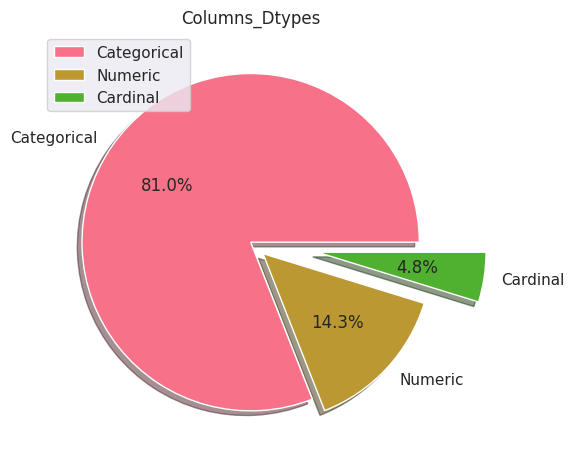

In [193]:
# Numeric ve Kategorik değişkenleri yakalayalım;

def grab_col_names(df,cat_th = 17, car_th = 20, plot = True):
  cat_cols = [col for col in df.columns if (df[col].dtype  == "O")]
  num_but_cat = [col for col in df.columns if (df[col].dtype != "O") and (df[col].nunique() <= car_th)]
  cat_but_car = [col for col in cat_cols if (df[col].nunique() > car_th)]

  cat_cols = [col for col in cat_cols if col not in cat_but_car]
  cat_cols = cat_cols + num_but_cat

  num_cols = [col for col in df.columns if df[col].dtype != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Cat_Cols: {len(cat_cols)}")
  print(f"Num_But_Cat: {len(num_but_cat)}")
  print(f"Cat_But_Car: {len(cat_but_car)}")
  print(f"Num_Cols: {len(num_cols)}")

  print("#"*30)

  if plot:
    fig,ax = plt.subplots()
    plt.pie([len(cat_cols),len(num_cols),len(car_cols)], labels = ["Categorical","Numeric", "Cardinal"], explode = (0, 0.1, 0.4) ,shadow = True, autopct = "%1.1f%%",colors = sns.color_palette("husl"))
    plt.title("Columns_Dtypes")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.show()

  return cat_cols,num_cols,cat_but_car

cat_cols,num_cols,car_cols = grab_col_names(df)

                   count      mean       std     min      5%     10%      20%  \
tenure         7043.0000   32.3711   24.5595  0.0000  1.0000  2.0000   6.0000   
MonthlyCharges 7043.0000   64.7617   30.0900 18.2500 19.6500 20.0500  25.0500   
TotalCharges   7043.0000 2279.7343 2266.7945  0.0000 48.6000 83.4700 265.3200   

                    30%      40%       50%       60%       70%       80%  \
tenure          12.0000  20.0000   29.0000   40.0000   50.0000   60.0000   
MonthlyCharges  45.8500  58.8300   70.3500   79.1000   85.5000   94.2500   
TotalCharges   548.4000 939.7800 1394.5500 2043.7100 3132.7500 4471.4400   

                     90%       95%       99%       max  
tenure           69.0000   72.0000   72.0000   72.0000  
MonthlyCharges  102.6000  107.4000  114.7290  118.7500  
TotalCharges   5973.6900 6921.0250 8039.2560 8684.8000  


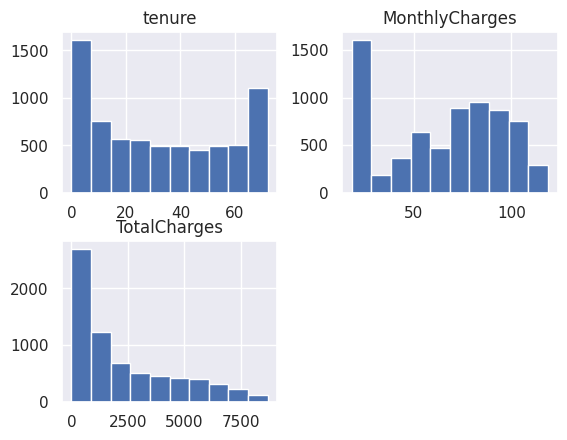

In [194]:
# numeric değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

num_summary(df, num_cols, plot =True)

        gender   Ratio
Male      3555 50.4756
Female    3488 49.5244


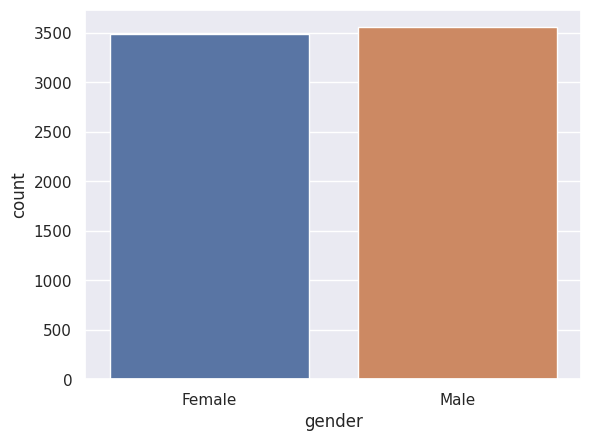

     Partner   Ratio
No      3641 51.6967
Yes     3402 48.3033


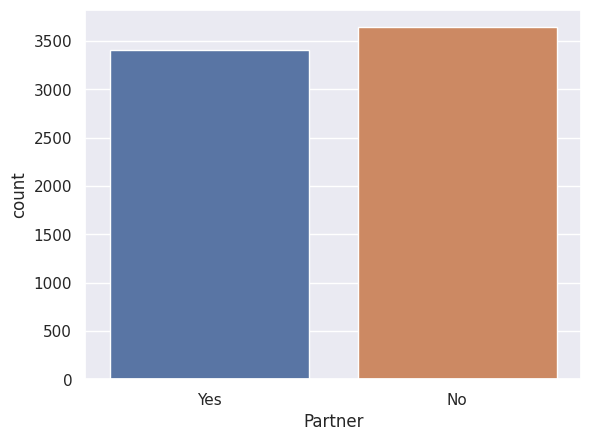

     Dependents   Ratio
No         4933 70.0412
Yes        2110 29.9588


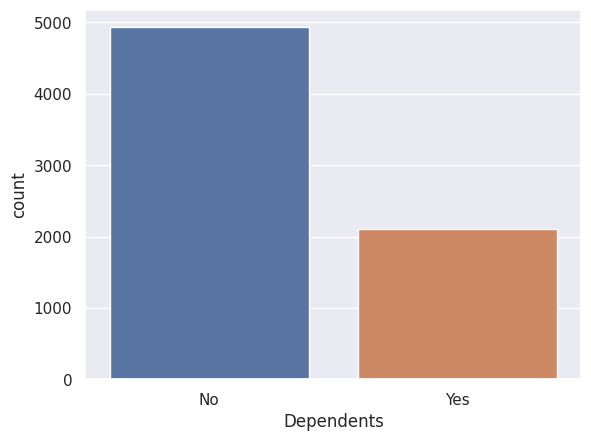

     PhoneService   Ratio
Yes          6361 90.3166
No            682  9.6834


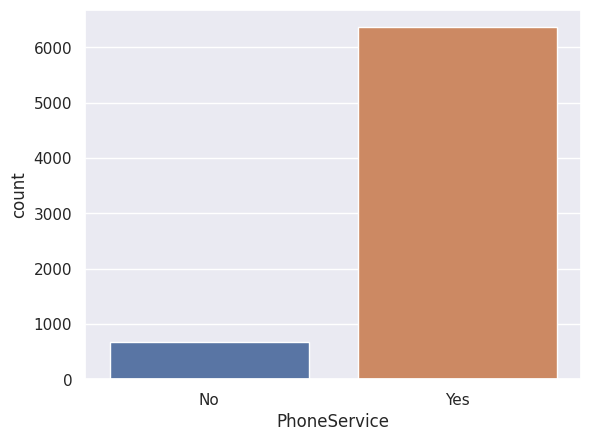

                  MultipleLines   Ratio
No                         3390 48.1329
Yes                        2971 42.1837
No phone service            682  9.6834


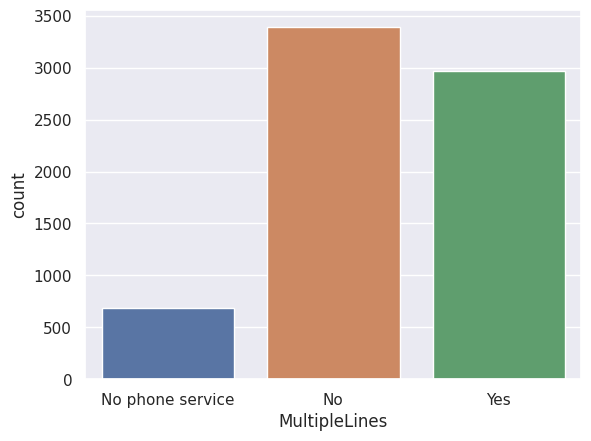

             InternetService   Ratio
Fiber optic             3096 43.9585
DSL                     2421 34.3746
No                      1526 21.6669


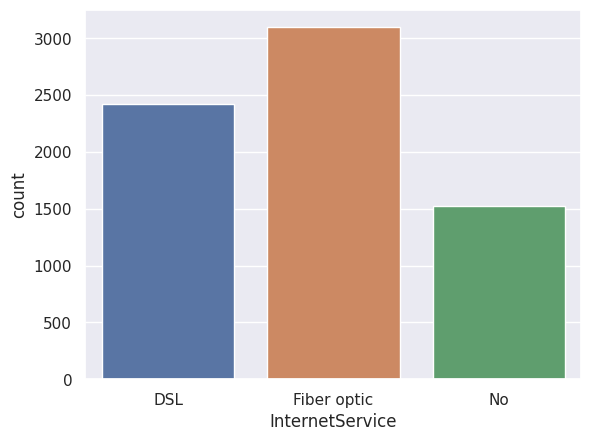

                     OnlineSecurity   Ratio
No                             3498 49.6663
Yes                            2019 28.6668
No internet service            1526 21.6669


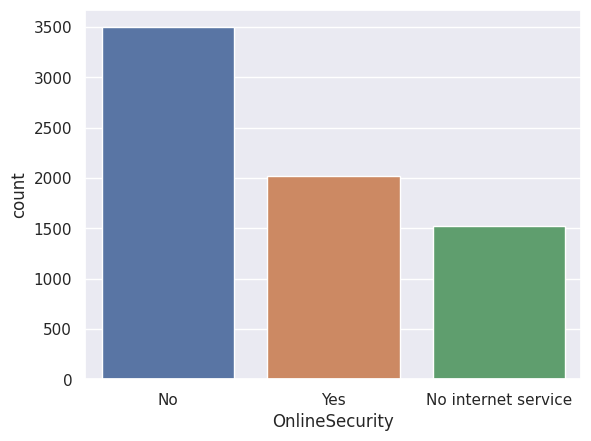

                     OnlineBackup   Ratio
No                           3088 43.8450
Yes                          2429 34.4881
No internet service          1526 21.6669


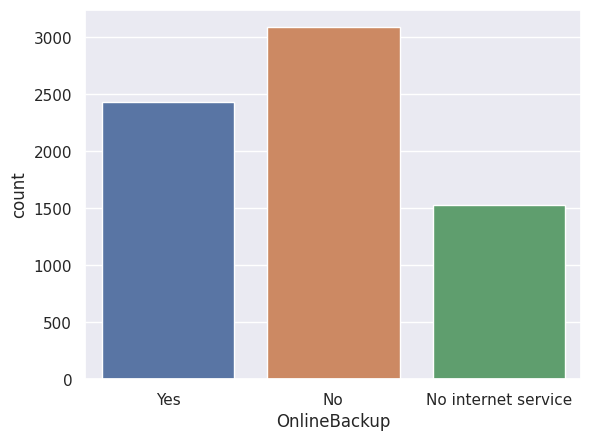

                     DeviceProtection   Ratio
No                               3095 43.9443
Yes                              2422 34.3888
No internet service              1526 21.6669


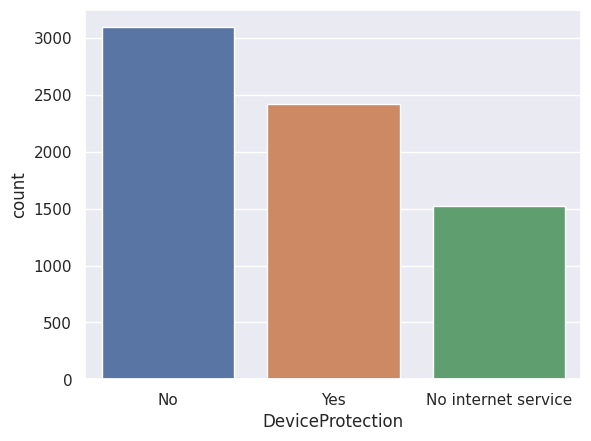

                     TechSupport   Ratio
No                          3473 49.3114
Yes                         2044 29.0217
No internet service         1526 21.6669


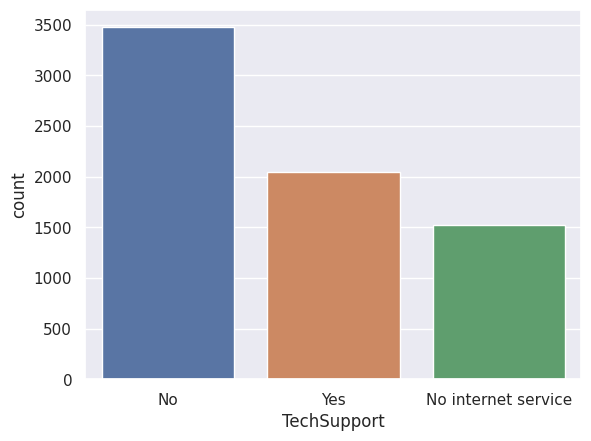

                     StreamingTV   Ratio
No                          2810 39.8978
Yes                         2707 38.4353
No internet service         1526 21.6669


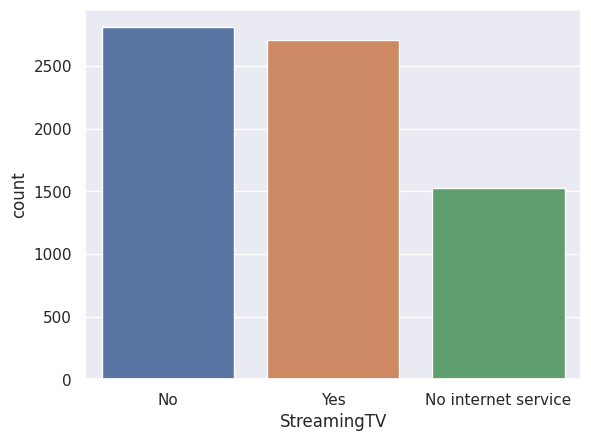

                     StreamingMovies   Ratio
No                              2785 39.5428
Yes                             2732 38.7903
No internet service             1526 21.6669


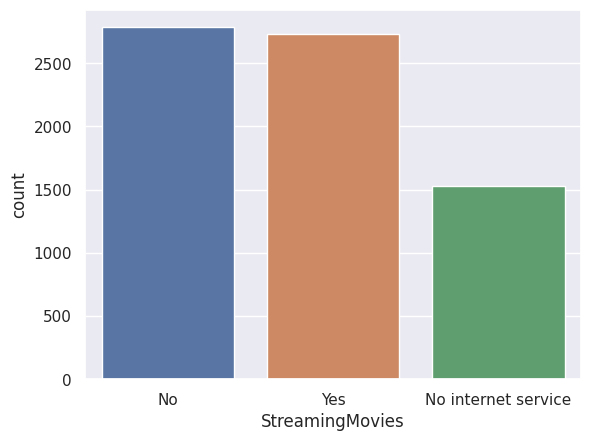

                Contract   Ratio
Month-to-month      3875 55.0192
Two year            1695 24.0664
One year            1473 20.9144


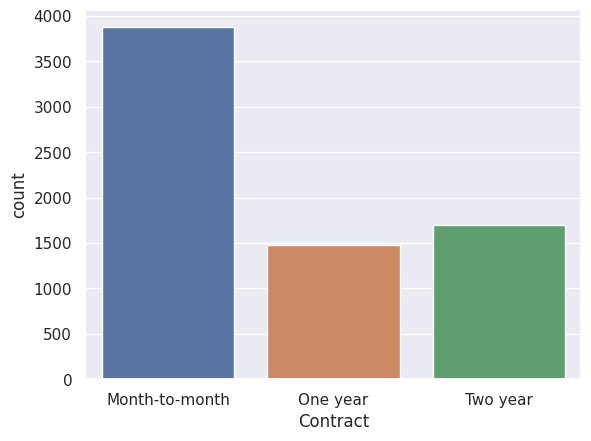

     PaperlessBilling   Ratio
Yes              4171 59.2219
No               2872 40.7781


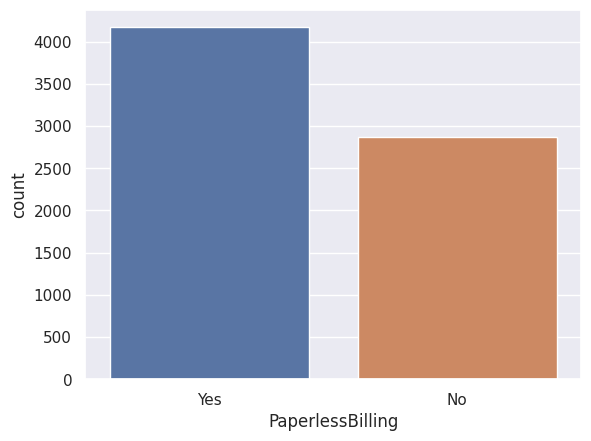

                           PaymentMethod   Ratio
Electronic check                    2365 33.5794
Mailed check                        1612 22.8880
Bank transfer (automatic)           1544 21.9225
Credit card (automatic)             1522 21.6101


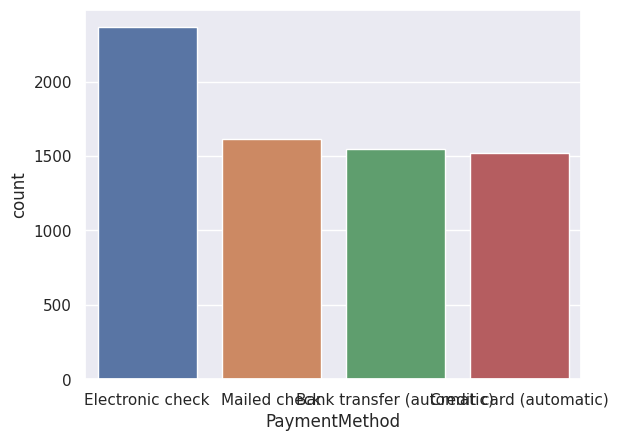

   SeniorCitizen   Ratio
0           5901 83.7853
1           1142 16.2147


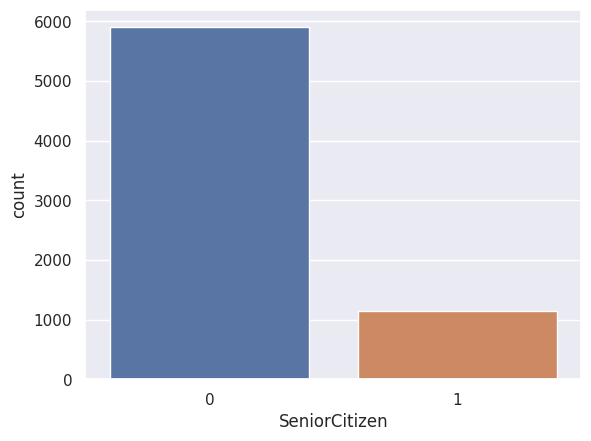

   Churn   Ratio
0   5174 73.4630
1   1869 26.5370


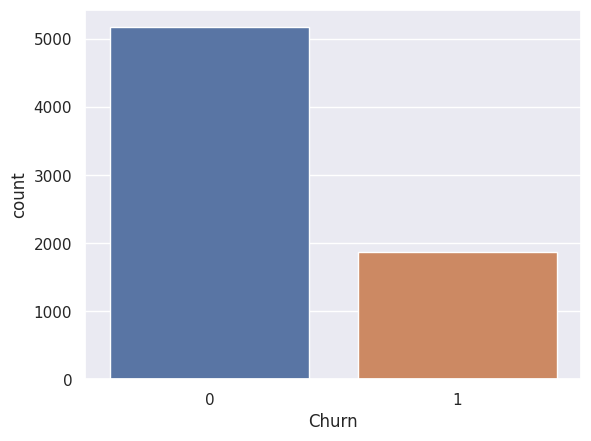

In [195]:
# kategorik değişken analizi

def cat_summary(datframe,col_name,plot=False):
    if datframe[col_name].dtypes  == "bool":
        datframe[col_name] = datframe[col_name].astype(int)

    print(pd.DataFrame({col_name: datframe[col_name].value_counts(),
                        "Ratio" : 100* datframe[col_name].value_counts(normalize=True)}))

    if plot:
        sns.countplot(x=datframe[col_name],data=datframe)
        plt.show(block=True)

for col in cat_cols:
  cat_summary(df,col,True)

In [196]:
# Kategorik Değişkenler ile hedef değişken analizi

# Hedef Değişkenin Kategorik Değişkenler ile Analizi
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
  target_summary_with_cat(df, "Churn", col)

        TARGET_MEAN
gender             
Female       0.2692
Male         0.2616


         TARGET_MEAN
Partner             
No            0.3296
Yes           0.1966


            TARGET_MEAN
Dependents             
No               0.3128
Yes              0.1545


              TARGET_MEAN
PhoneService             
No                 0.2493
Yes                0.2671


                  TARGET_MEAN
MultipleLines                
No                     0.2504
No phone service       0.2493
Yes                    0.2861


                 TARGET_MEAN
InternetService             
DSL                   0.1896
Fiber optic           0.4189
No                    0.0740


                     TARGET_MEAN
OnlineSecurity                  
No                        0.4177
No internet service       0.0740
Yes                       0.1461


                     TARGET_MEAN
OnlineBackup                    
No                        0.3993
No internet service       0.0740
Yes                       0.21

In [197]:
# Aykırı değer Analizi Yapalım;

#! aykırı değer için eşik oluşturacak fonksiyon;
def outlier_thresholds(dataframe,col_name,q1 = 0.10, q3=0.90):
  quantile1 = dataframe[col_name].quantile(q1)
  quantile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quantile3 - quantile1
  up_limit = quantile3 + 1.5* interquantile_range
  low_limit = quantile1 - 1.5* interquantile_range

  return low_limit,up_limit

#! Aykırı değer var mı sorusu için fonksiyon;
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

#! baskılama yöntemi için fonksiyon;
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
  print(col,":",check_outlier(df,col))

tenure : False
MonthlyCharges : False
TotalCharges : False


In [198]:
# Eksik Gözlem Analizi Yapalım;

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

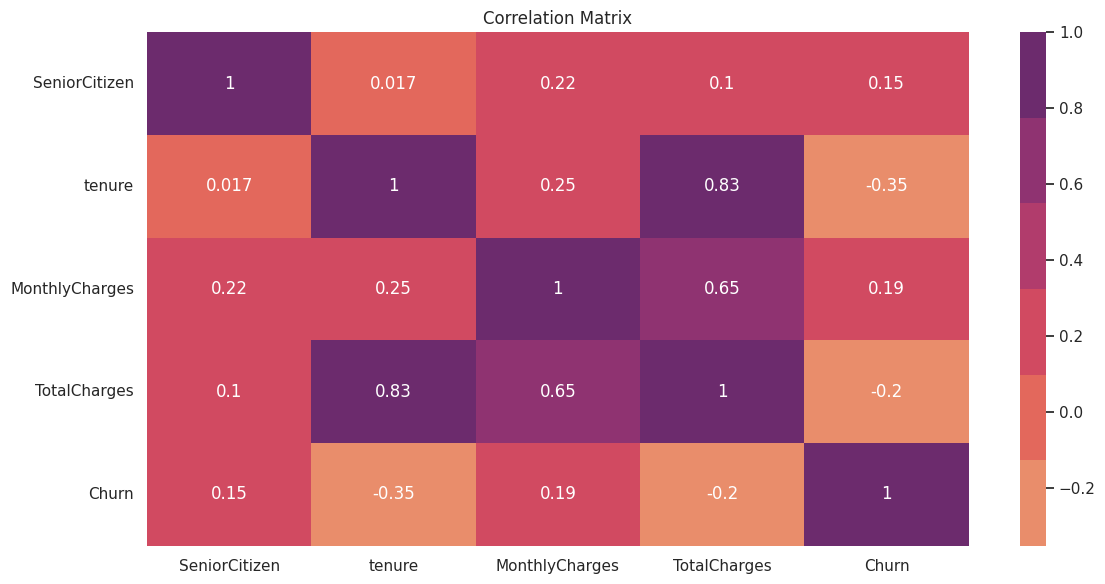

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [199]:
# Yüksek Korelasyon Analizi Yapalım;

def high_corr(df,corr_th = .80, plot = True):
  corr = df.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape).astype(np.bool), k = 1))
  corr_cols =[col for col in upper_triangle_matrix if (upper_triangle_matrix[col]).any(axis = None) >= corr_th]

  if plot:
    fig,ax = plt.subplots(figsize = (12,6))
    sns.set(font_scale = 1)

    sns.heatmap(corr, cmap = sns.color_palette("flare"),annot =True)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show(block = True)

  return corr_cols

high_corr(df,True)


In [200]:
# Rare Analiz Oluşturalım;

def rare_analyser(dataframe,target,cat_cols):
  for col in cat_cols:
    print(col, ":" , len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT" : dataframe[col].value_counts(),
                        "RATIO" : dataframe[col].value_counts(normalize=True),
                        "TARGET_MEAN" : dataframe.groupby(col)[target].mean()}), end = "\n\n\n")

rare_analyser(df,"Churn",cat_cols)

gender : 2
        COUNT  RATIO  TARGET_MEAN
Female   3488 0.4952       0.2692
Male     3555 0.5048       0.2616


Partner : 2
     COUNT  RATIO  TARGET_MEAN
No    3641 0.5170       0.3296
Yes   3402 0.4830       0.1966


Dependents : 2
     COUNT  RATIO  TARGET_MEAN
No    4933 0.7004       0.3128
Yes   2110 0.2996       0.1545


PhoneService : 2
     COUNT  RATIO  TARGET_MEAN
No     682 0.0968       0.2493
Yes   6361 0.9032       0.2671


MultipleLines : 3
                  COUNT  RATIO  TARGET_MEAN
No                 3390 0.4813       0.2504
No phone service    682 0.0968       0.2493
Yes                2971 0.4218       0.2861


InternetService : 3
             COUNT  RATIO  TARGET_MEAN
DSL           2421 0.3437       0.1896
Fiber optic   3096 0.4396       0.4189
No            1526 0.2167       0.0740


OnlineSecurity : 3
                     COUNT  RATIO  TARGET_MEAN
No                    3498 0.4967       0.4177
No internet service   1526 0.2167       0.0740
Yes                   

In [201]:
# Özellik Çıkarımı ;

# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


df.head()
df.shape



(7043, 30)

Cat_Cols: 23
Num_But_Cat: 8
Cat_But_Car: 1
Num_Cols: 6
##############################


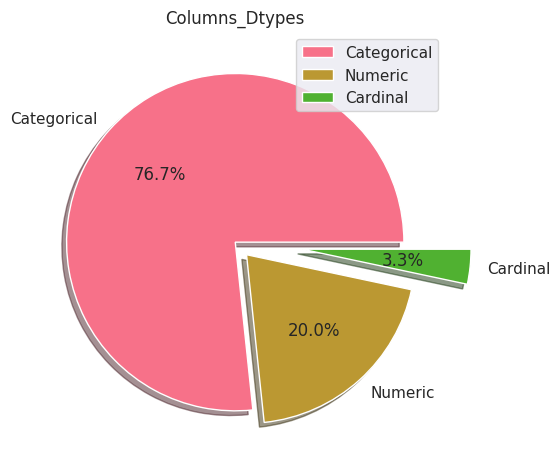

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.8500,29.8500,0,0,1,1,1,0,0,14.9250,0.5000,14.9250
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.9500,1889.5000,0,1,1,0,3,0,0,53.9857,0.9479,14.2375
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.8500,108.1500,1,0,1,1,3,0,0,36.0500,0.6695,13.4625


In [202]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Label Encoder işlemlerini gerçekleştirelim;

binary_cols = [col for col in df.columns if len(df[col].unique()) == 2 and df[col].dtype == "O"]

def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

for col in binary_cols:
  df = label_encoder(df, col)

df.head(3)

In [203]:
# One Hot Encoder işlemini yapalım;

# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in [binary_cols,"Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,1,29.8500,29.8500,0,1,14.9250,0.5000,14.9250,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
1,5575-GNVDE,34,56.9500,1889.5000,0,3,53.9857,0.9479,14.2375,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
2,3668-QPYBK,2,53.8500,108.1500,1,3,36.0500,0.6695,13.4625,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
3,7795-CFOCW,45,42.3000,1840.7500,0,3,40.0163,0.9460,10.5750,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
4,9237-HQITU,2,70.7000,151.6500,1,1,50.5500,0.7150,35.3500,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0


### Görev 3

In [270]:
# bağımlı - bağımsız değişkenleri atayalım;

X = df.drop(["customerID","Churn"], axis = 1)
y = df["Churn"]

# accuracy değerlerine göre en iyi 4 classification modelini seçelim;

models = (("LR", LogisticRegression(random_state = 12345)),
          ("SVM",SVC(gamma='auto',random_state = 12345)),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier(random_state = 12345 )),
          ("RF", RandomForestClassifier(random_state = 12345)),
          ("GBM", GradientBoostingClassifier(random_state = 12345)),
          ("XGBoost", XGBClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state = 12345)),
          ("CatBoost", CatBoostClassifier(verbose = False , random_state = 12345)))

def cv_result(model,X,y, cv = 10, scoring = ["accuracy","precision","recall","f1","roc_auc"]):
  cross = cross_validate(model,X,y, cv = cv, n_jobs = -1,scoring=scoring)
  for i in list(cross.keys())[2:]:
    name = i[5:]
    score = cross[i].mean()
    print(f"{name} ==> {score}")


for name, model in models:
  model.fit(X,y)

  print(name)
  cv_result(model,X,y)
  print("#"*30)




LR
accuracy ==> 0.79979750967118
precision ==> 0.6624254345954462
recall ==> 0.5077856362486344
f1 ==> 0.5738960242435184
roc_auc ==> 0.8390916284965482
##############################
SVM
accuracy ==> 0.767141360412637
precision ==> 0.6739452660605995
recall ==> 0.2429158760278305
f1 ==> 0.3558602221964339
roc_auc ==> 0.7233479531755603
##############################
KNN
accuracy ==> 0.7702643455834945
precision ==> 0.5858763943522376
recall ==> 0.4644413777241102
f1 ==> 0.5172129397140359
roc_auc ==> 0.7541461873626989
##############################
CART
accuracy ==> 0.7269586154094133
precision ==> 0.4861317593672599
recall ==> 0.5024035420619861
f1 ==> 0.4939315908493532
roc_auc ==> 0.6565185355270744
##############################
RF
accuracy ==> 0.7941201241134752
precision ==> 0.6437513933261134
recall ==> 0.5035046863320108
f1 ==> 0.5647551483297364
roc_auc ==> 0.8282217446054023
##############################
GBM
accuracy ==> 0.8017869519664732
precision ==> 0.663633768197573
r

In [271]:
models = (("LR", LogisticRegression(random_state = 12345)),
          ("SVM",SVC(gamma='auto',random_state = 12345)),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier(random_state = 12345 )),
          ("RF", RandomForestClassifier(random_state = 12345)),
          ("GBM", GradientBoostingClassifier(random_state = 12345)),
          ("XGBoost", XGBClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state = 12345)),
          ("CatBoost", CatBoostClassifier(verbose = False , random_state = 12345)))
nm = []
for name, model in models:
  model.fit(X,y)
  cv_result = cross_validate(model, X,y, n_jobs = -1 , scoring = ["accuracy","precision","recall","f1","roc_auc"])
  nm.append((name, cv_result["test_accuracy"].mean(), cv_result["test_precision"].mean(),
             cv_result["test_recall"].mean(), cv_result["test_f1"].mean(), cv_result["test_roc_auc"].mean()))

model_df = pd.DataFrame(nm, columns = ["model","accuracy","precision","recall","f1","roc_auc"]).set_index("model").style.background_gradient("Reds")

model_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243


,accuracy,precision,recall,f1,roc_auc
model,,,,,
LR,0.804346,0.675276,0.505107,0.577624,0.841900
SVM,0.765158,0.663344,0.236480,0.347775,0.722399
KNN,0.766434,0.575551,0.459602,0.510803,0.752158
CART,0.729094,0.490302,0.499706,0.494699,0.657075
RF,0.790716,0.634976,0.499733,0.559123,0.826894
GBM,0.799943,0.657775,0.513104,0.576443,0.844554
XGBoost,0.785179,0.617232,0.502953,0.554187,0.823394
LightGBM,0.794549,0.638591,0.521139,0.573808,0.835756
CatBoost,0.797532,0.652477,0.507231,0.570727,0.840561


In [273]:
#####################################
# RandomForest
#####################################

rf_model = RandomForestClassifier(random_state = 40).fit(X,y)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

rf_grid = GridSearchCV(rf_model,rf_params ,cv = 2, n_jobs = -1, verbose = 1 ).fit(X,y)

rf_final = rf_model.set_params(**rf_grid.best_params_).fit(X,y)

cv_result(rf_final,X,y)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


TypeError: ignored

In [ ]:
#####################################
# XGBoost
#####################################
xgbm_model = XGBClassifier(random_state = 40).fit(X,y)

xgbm_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 8, 12, 15, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

xgbm_grid = GridSearchCV(xgbm_model, xgbm_parms, cv = 2, n_jobs = -1 , verbose = 1).fit(X,y)

xgbm_final = xgbm_model.set_params(**xgbm_grid.best_params_).fit(X,y)

cv_result(xgbm_final,X,y)

In [ ]:
#####################################
# LightGBM
#####################################

lgbm_model = LGBMClassifier(random_state = 40).fit(X,y)

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_params = GridSearchCV(lgbm_model, lgbm_params, cv = 5, n_jobs = -1  , verbose = True).fit(X,y)

lgbm_final = lgbm_model.set_params(**lgbm_params.best_params_).fit(X,y)

cv_result(lgbm_final,X,y)

In [ ]:
#####################################
# CatBoost
#####################################

catboost_model = CatBoostClassifier(random_state = 40, verbose = False).fit(X,y)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_grid = GridSearchCV(catboost_model, catboost_params, cv = 2, n_jobs = -1 , verbose = True).fit(X,y)

catboost_final = catboost_model.set_params(**catboost_params.best_params_).fit(X,y)

cv_result(catboost_final,X,y)


In [ ]:
################################################
# Feature Importance
################################################


def plot_importances(model,features = X, num =len(X), save =False):
  feature_imp = pd.DataFrame({"Value" : model.feature_importances_, "Feature" : features.columns})
  fig,ax = plt.subplots(figsize = (10,8))
  sns.set(font_scale = 1)
  sns.barplot(x = "Value", y= "Feature", data 0 feature_imp.sort_values(by = "Value", ascending =False)[:num])
  plt.tight_layout()
  plt.title(f" Features Importances of {type(model).__name__}")
  plt.show(block = True)

  if save:
    plt.figsave("importances.png")

for col in [rf_final, xgbm_final,lgbm_final, catboost_final]:
  plot_importances(model)
